<a href="https://colab.research.google.com/github/Faara34/-Optimisation-of-Travel-Routes-in-Colombo-Using-Python/blob/main/Mathcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Modelling travel time

In [26]:

## Problem 1: Modelling Travel Time
## Problem 2: Cost Analysis Using Integration
## Problem 3: Predicting Peak Travel Times
## Problem 4: Travel Pattern Analysis Using Fourier Transform
## Problem 5: Image Processing Using Fourier and DCT


In [27]:
import sympy as sp



In [28]:
# x = distance
#y = traffic delay

#define the symbols
x, y, a, b, c = sp.symbols('x y a b c')

tb = (a*x**2) + (b*y**2)
tt = sp.sqrt(c*(x**2 + y**2))

In [29]:
grad_tb = [sp.diff(tb, x), sp.diff(tb, y)]
grad_tt = [sp.diff(tt, x), sp.diff(tt, y)]

grad_tb, grad_tt

([2*a*x, 2*b*y],
 [x*sqrt(c*(x**2 + y**2))/(x**2 + y**2),
  y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)])

For buses, both distance and congestion affect travel time quadratically. This means that as distance or traffic increases, travel time increases at a faster rate. The partial derivatives shows that the rate of change of travel time itself increases with congestion and distance, and in practice congestion has a greater impact due to frequent stops and boarding delays




For taxis, both distance and congestion are combined under a square root, which smooths their effect on travel time. Meaning that taxis are less affected by congestion compared to buses.Mathematically both the factors contribute in a ablanced way. But practically, taxis can change paths inorder to avoid congestion, so distance becomes the dominant factor affecting travel time compared to traffic.

---



2. Cost Analysis using Integration

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#a
t = sp.symbols('t')
Fb = sp.integrate( 2*t + 1 ,(t, 0,x))
Ft = sp.integrate(3*t +2 ,(t, 0,x))

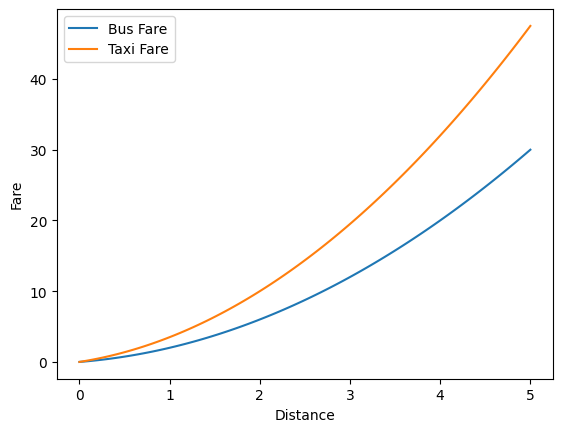

In [33]:
x_vals = np.linspace(0,5,100)
Fb_func =sp.lambdify(x, Fb, 'numpy')
Ft_funct= sp.lambdify(x, Ft, 'numpy')

plt.plot(x_vals, Fb_func(x_vals), label='Bus Fare')
plt.plot(x_vals, Ft_funct(x_vals), label='Taxi Fare')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.legend()
plt.show()

For short distances, the difference between taxi fare and bus fare is relatively smalll, eventhough the bus remains slightly cheaper. However, the graph shows that taxi fares increase at a faster rate tham bus fares. As distance increases, this difference becomes more significant, making buses more affordable than taxis

---

